In [ ]:
!pip install qiskit qiskit-aer

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler

In [5]:
def quantum_rng(num_bits=8):
    """Now we generate a quantum random number with the given number of bits"""
    simulator = AerSimulator()
    sampler = StatevectorSampler()
    
    random_bits = ""
    for _ in range(num_bits):
        # Create a new circuit for each bit
        qrng_circuit = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
        qrng_circuit.h(0)  # Put qubit in superposition
        qrng_circuit.measure(0, 0)  # Measure and collapse the state
        
        # Run the circuit directly with the simulator
        result = simulator.run(qrng_circuit, shots=1).result()
        counts = result.get_counts()
        bit = list(counts.keys())[0] 
        random_bits += bit
    
    random_number = int(random_bits, 2)  # Convert bits to integer
    return random_number, random_bits

In [8]:
# This code generates an 8-bit quantum random number
random_number, bits = quantum_rng(8)
print(f"Quantum Random Number: {random_number} (Binary: {bits})")

Quantum Random Number: 133 (Binary: 10000101)


In [9]:
qc = QuantumCircuit(1, 1)
qc.h(0) # Apply Hadamard gate
qc.measure(0, 0) # Measure qubit

In [11]:
from qiskit_aer import Aer

In [12]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print(counts) # Random 0s and 1s

{'0': 517, '1': 507}


In [13]:
# Draw the circuit
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [14]:
from qiskit.visualization import *

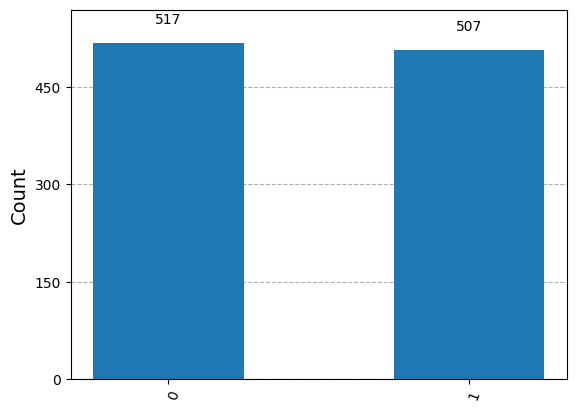

In [15]:
# Plot a histogram
plot_histogram(counts)

In [16]:
qc = QuantumCircuit(2, 2)
qc.h(0) # Apply Hadamard gate
qc.cx(0, 1) # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
qc.measure([0,1], [0,1]) # Measure qubit

In [17]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print(counts) 

{'11': 521, '00': 503}


In [18]:
# Draw the circuit
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

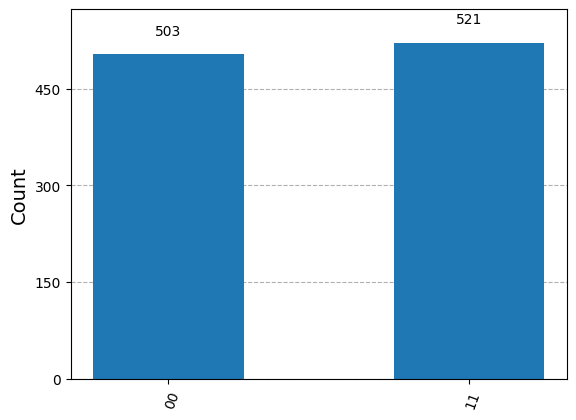

In [19]:
# Plot a histogram
plot_histogram(counts)